## Instrucciones para esta prueba
- Renombra esta hoja sustituyendo *nombre-apellido* con tus datos.
- Explicar en cada paso, con cuadros de texto, la estrategia seguida para resolverlo.
- Subir a la <a href="https://moodle.uam.es/mod/assign/view.php?id=1726572">tarea de moodle</a> el resultado final.

**Problema 1 (hasta 3 puntos).** Se sabe que para cualesquiera reales $\mu,\sigma$ con $\sigma>0$, la función $$f(x)=\frac{1}{\sigma\sqrt{2\pi}}\,\exp\big\{\frac{-1}2\big(\frac{x-\mu}\sigma\big)^2\big\}$$
verifica que $\int_{-\infty}^{\infty}f(x)\,dx=1$.

Queremos aprovechar que esta _área_ es $1$ para _repartirla_ en $2m+1$ intervalos disjuntos, los $2m-1$ centrales de igual amplitud, digamos $2a$, y dos extremos, o _colas_, definidos como:
$$\begin{array}{l}I_{-m}=(-\infty,\mu-(2m-1)a),\,\,\dots,I_{-1}=[\mu-3a,\mu-a),\,\,I_0=[\mu-a,\mu+a),\\
{I_1=[\mu+a,\mu+3a)},\,\,\dots,I_m=[\mu+(2m+1)a,\infty)
\end{array}$$
asignando para cada uno de ellos el área bajo la curva sobre el intervalo:
$$p_j=\int_{I_j}f(x)\,dx\quad j\in\{-m,\dots,-1,0,1,\dots m\}.$$
Puesto que son números no negativos y $\sum\limits_{-m}^m p_j=1$, podemos tomarlos como probabilidades asociadas a estos $2m+1$ intervalos, en el siguiente sentido: 
$$P(\text{ tomar al azar un real en el intervalo }I_k)=p_k,\qquad k\in\{-m,\dots,-1,0,1,\dots,m\}.$$
Pero tenemos un problema, **no nos permiten utilizar ninguna herramienta de integración para calcularlos**, de manera que vamos a tener que **aproximar** con el **método de Monte Carlo**.

_Considera $2m+1=9$ intervalos como los descritos, los $7$ centrales de amplitud $2a=10$, para 
$$\mu=100+(\text{dos últimas cifras de tu dni}),\quad \sigma=\mu/10,$$
y aproxima las $p_j$ utilizando el método de Monte Carlo para los $7$ intervalos centrales, y repartiendo por igual lo que falte para tener el área completa, $1$, entre las áreas a asignar a los dos intervalos extremos._

In [2]:
# 9 regiones, por lo que 8 separadores:
mu = 100 + 89
a = 5
separadores = [(mu + (2*j-1)*a) for j in [-3.. 4]]
print (separadores)

[154, 164, 174, 184, 194, 204, 214, 224]


In [3]:
def gen_num(a, b): #núm aleatorio entra a y b, a<b
    return a+(b-a)*random()

In [6]:
s = mu/10
f(x) = 1/(s*sqrt(2*pi)) * e^(-(1/2)*((x-mu)/s)^2)

def area_segmento_bajo_f(f, x, a, b):
    '''
    f función >=0, x, variable, a, el x mínimo; b el x máximo
    '''
    max_value = f.find_local_maximum(a, b)[0]
    M = 10^3
    count = 0
    for _ in range(M):
        #generamos un punto (x, y) en el rectángulo
        xx = gen_num(a,b)
        yy = gen_num(0, max_value)
        #comprobamos si el punto está dentro del área
        if yy < f.substitute(x=xx):
            count +=1
    total_area_rectangle = (b-a) * max_value * 1.#área total
    proportion = count / M * 1. #proporción de puntos dentro del área
    return proportion*total_area_rectangle*1.

In [7]:
float(area_segmento_bajo_f(x^2, x, 0, 1))# aprox 1/3

0.3579999794509731

In [9]:
areas = []
for j in range(7):
    areas.append(area_segmento_bajo_f(f, x, separadores[j], separadores[j+1]))
print (areas)
# no sé porqué las areas no se calculan bien-dan todas 0-, pero he hecho el método de Monte Carlo

[0.0593159957304111, 0.118775137299371, 0.178751778937873, 0.208969765924560, 0.185477900608284, 0.123550777912882, 0.0576438732577033]


In [11]:
area_extremos = sum(areas) / 2
resultado = [area_extremos]+areas+[area_extremos]
print(resultado)

[0.466242614835542, 0.0593159957304111, 0.118775137299371, 0.178751778937873, 0.208969765924560, 0.185477900608284, 0.123550777912882, 0.0576438732577033, 0.466242614835542]


**Problema 2 (hasta 4 puntos).** En un campamento de verano tienen montadas 8 carpas para actividades diferentes, numeraradas del 1 al 8, alrededor de una carpa, numerada con 0, dedicada a descanso y organización.

Cada día antes de las 08:00, la hora de comienzo de las actividades, los campistas acuden a la carpa central donde cada uno sortea en qué carpa va a comenzar sus actividades, tomando una bola, de una urna con 8 bolas numeradas del 1 al 8, y devolviéndola a la urna.

Cada participante va a la carpa que le corresponde, realiza la actividad y a la media hora han de cambiar de carpa tomando, unos minutos antes de salir, una bola de una urna con bolas numeradas que hay en cada carpa, y devolviéndola. Sobre la composición de las urnas se tiene que:

- En todas hay una bola numerada con el 0, si la cogen, vuelven a la carpa central y permanecen en ella media hora descansando. 
- En cada una hay una bola con el número de la carpa anterior y otra con la de la posterior (a la 8 le sigue la 1, y a la 1 le precede la 8). 
- Para los sorteos de las horas en punto, las carpas 1, 2, 5 y 6 añaden a la urna una bola con el número de la propia carpa, que retiran para los de las horas y media. 
- En las carpas 3, 4, 7 y 8, se añade una bola con el número de la propia carpa en los sorteos de las horas y media, y se retira en los de las horas en punto.

A las 13:30 paran la actividad por las carpas.

_a) Construye dos matrices de sage, $P$ y $Q$, tales que
$$\begin{array}{l} P[i,j]=\text{ probabilidad de extraer en la carpa }i\text{ la bola }j
\text{ en una hora en punto}\\
Q[i,j]=\text{ probabilidad de extraer en la carpa }i\text{ la bola }j
\text{ en las horas y media.}
\end{array}
$$_

_b) Utilìzalas para responder a las **dos preguntas** que te han correspondido en el <a href="https://moodle.uam.es/mod/quiz/view.php?id=1726452">Cuestionario para el parcial 3</a> habilitado en moodle._

In [57]:
# usamos la función de las cadenas de Markov
def paso(v):
    '''v es un a lista de probabilidades-suman 1'''
    if sum(v)!=1:
        return None # error, no debe pasar
    F=[sum(v[:j]) for j in [1..len(v)]]
    num = random()
    j=0
    while num>F[j]:
        j+=1
    return j

In [60]:
P = matrix(RDF,9)
P[0,[1,2, 3, 4, 5, 6, 7, 8]] = 1/8
P[1,[0, 8,1,2]] = P[2,[0, 1, 2, 3]] = P[5,[0, 4, 5, 6]] = P[6,[0, 5, 6, 7]] = 1/4
P[3,[0, 2, 4]] = P[4,[0,3,5]] = P[7,[0, 6, 8]] = P[8,[0, 1, 7]] = 1/3

show(P.n(digits=2))

[0.00 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12]
[0.25 0.25 0.25 0.00 0.00 0.00 0.00 0.00 0.25]
[0.25 0.25 0.25 0.25 0.00 0.00 0.00 0.00 0.00]
[0.33 0.00 0.33 0.00 0.33 0.00 0.00 0.00 0.00]
[0.33 0.00 0.00 0.33 0.00 0.33 0.00 0.00 0.00]
[0.25 0.00 0.00 0.00 0.25 0.25 0.25 0.00 0.00]
[0.25 0.00 0.00 0.00 0.00 0.25 0.25 0.25 0.00]
[0.33 0.00 0.00 0.00 0.00 0.00 0.33 0.00 0.33]
[0.33 0.33 0.00 0.00 0.00 0.00 0.00 0.33 0.00]

In [61]:
Q = matrix(RDF,9)
Q[0,[1,2, 3, 4, 5, 6, 7, 8]] = 1/8
Q[1,[0, 8,2]] = Q[2,[0, 1, 3]] = Q[5,[0, 4,6]] = Q[6,[0, 5, 7]] = 1/3
Q[3,[0, 2, 3, 4]] = Q[4,[0,3,4,5]] = Q[7,[0, 6, 7, 8]] = Q[8,[0, 1,8,  7]] = 1/4

show(Q.n(digits=2))

[0.00 0.12 0.12 0.12 0.12 0.12 0.12 0.12 0.12]
[0.33 0.00 0.33 0.00 0.00 0.00 0.00 0.00 0.33]
[0.33 0.33 0.00 0.33 0.00 0.00 0.00 0.00 0.00]
[0.25 0.00 0.25 0.25 0.25 0.00 0.00 0.00 0.00]
[0.25 0.00 0.00 0.25 0.25 0.25 0.00 0.00 0.00]
[0.33 0.00 0.00 0.00 0.33 0.00 0.33 0.00 0.00]
[0.33 0.00 0.00 0.00 0.00 0.33 0.00 0.33 0.00]
[0.25 0.00 0.00 0.00 0.00 0.00 0.25 0.25 0.25]
[0.25 0.25 0.00 0.00 0.00 0.00 0.00 0.25 0.25]

In [73]:
# Estima la probabilidad de que un campista se encuentre en un día en el que no ha conseguido descansar.
[j/2 for j in [16..26]] # las horas del día, a  las 13:30 np hay sorteo

def simulate_day(): # true si descansa alguna vez
    estado = 0
    for j in [16..26]:
        if j%2:
            estado = paso(P[estado])
        else:
            estado = paso(Q[estado])
        if estado == 0:
            return True
    return False
M = 10^4
count = 0
for _ in xrange(M):
    if simulate_day() == False:
        count+=1
prob = count/M
print(prob*1.)# probabilidad de que no descanse en todo el día

0.0304000000000000


In [79]:
#Estima el tiempo medio (en horas) de actividad de un campista en un día.
def simulate_day_count_hours(): # número  de horas activo
    estado = 0
    hours = 0
    for j in [16..26]:
        if j%2:
            estado = paso(P[estado])
        else:
            estado = paso(Q[estado])
        if estado != 0:
            hours += 1/2
    return hours
M = 10^4
total_hours = 0
for _ in xrange(M):
    total_hours+=simulate_day_count_hours()
media = total_hours/M
print(media*1.)# media de horas activo

4.32840000000000



**Problema 3 (hasta 3 puntos).** El planeta "Vasque" describe la trayectoria de ecuación
$$c(t)=(\cos t\,\cos(3t),\sin t\,\cos(3t),\cos^2(3t)$$
completando una vuelta completa durante cada intervalo de amplitud $2\pi$.

Su satélite "LunaVasque" orbita a su alrededor, a distancia fija $r$, en un plano perpedicular, en cada momento $t_0$, al vector $c'(t_0)$. Por cada vuelta completa del planeta, su luna da $4$. El resultado se puede ver en el fichero "Vasque.gif".

_Emula un fichero como el gif del ejemplo, tomando para el planeta la trayectoria que te ha correspondido en el <a href="https://moodle.uam.es/mod/quiz/view.php?id=1726452">Cuestionario para el parcial 3</a>, y con una luna que describa $4$ vueltas por cada vuelta completa de su planeta. (Nombra al planeta, y el gif, con el nombre de la trayectoria.)_

Ten en cuenta que, en cada momento, los tres vectores
$$\begin{array}{ll}T(t)=\dfrac{c'(t)}{\|c'(t)\|} &\quad \text{ vector tangente}\\
B(t)=\dfrac{c'(t)\times c''(t)}{\|c'(t)\times c''(t)\|}&\quad \text{ vector binormal}\\
N(t)=B(t)\times T(t)&\quad\text{ vector normal}
\end{array}$$

son tres vectores unitarios y ortogonales, y conforman el conocido como Triedro de Frênet, un _sistema de referencia ortonormal local_ en cada punto de la trayectoria $c(t)$. En particular, cualquier vector $v(t)=r_1\cos(\lambda t)N(t)+r_1\sin(\lambda t)B(t)$ es de norma $r_1$ y está en un plano perpendicular a $T(t)$.

_Indicación_: En sage, si $v_1$ y $v_2$ son dos vectores, $v_1$.cross_product($v_2$) calcula el vector $v_1\times v_2$.

_Atención_: si vas a utilizar el vector normal, **evita el nombre N**, reservado en sage para la función _numerical$\_$approx_.

Nombre: hipotrocoide

$$c(t)=(3\cos t+5\cos(3t),\,3\sin t-5\sin(3t),0)$$

Vuelta completa: $t\in [0,2\pi]$

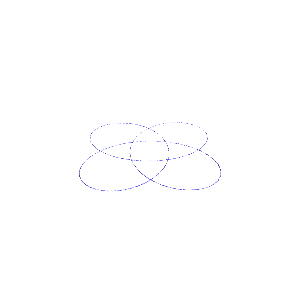

In [1]:
r = 1
var('t')
c(t) = (3*cos(t)+5*cos(3*t), 3*sin(t)-5*sin(3*t), 0)
orb = parametric_plot(c, (t,0,2*pi),plot_points=1000,thickness=1,frame=False, viewer='tachyon')

orb.show(figsize=3)

In [2]:
cp = c.diff(t)
cpp = cp.diff(t)
c_aux = c.cross_product(cp)
T = cp*1/norm(c)
B = c_aux*1/norm(c_aux)
NN = B.cross_product(T)

Animation with 200 frames
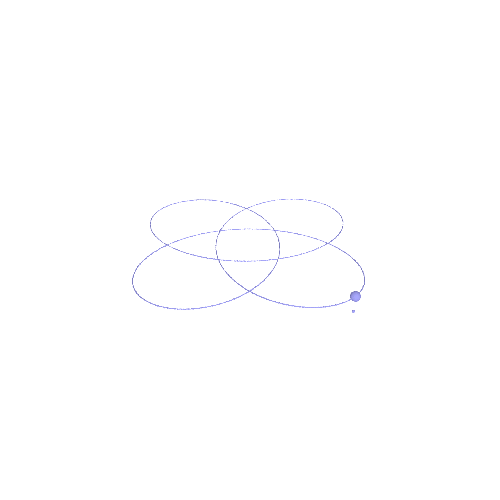

In [5]:
fotogramas = []
M = 80
r = 1

for j in range(M):
    tt = j*2*pi/M
    p = vector(c(tt))
    p2 = p+r*cos(4*tt)*vector(B(tt))+r*sin(4*tt)*vector(NN(tt))
    fotogramas.append(orb
                      +sphere((p[0], p[1], p[2]), size=0.3,frame=False, viewer='tachyon')
                      +sphere((p2[0], p2[1], p2[2]), size=0.1,frame=False, viewer='tachyon'))
    
movie = animate(fotogramas)
movie.show()
movie.save('Pablo_Cuesta_2.gif')